<a href="https://colab.research.google.com/github/1801320/-/blob/main/%EC%9D%B4%EC%98%81%EC%9B%856%EA%B0%957%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

In [22]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df_train.shape

(891, 12)

In [27]:
df_test.shape

(418, 11)

In [28]:
df_train['Age'].isnull().sum()

177

In [29]:
100*df_train['Age'].isnull().sum()/df_train[df_train.columns].shape[0]

19.865319865319865

In [32]:
for col in df_train.columns:
  msg = '{:>10}:\t Percentage of NaN: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() /df_train[col].shape[0]))
  print(msg)

PassengerId:	 Percentage of NaN: 0.00%
  Survived:	 Percentage of NaN: 0.00%
    Pclass:	 Percentage of NaN: 0.00%
      Name:	 Percentage of NaN: 0.00%
       Sex:	 Percentage of NaN: 0.00%
       Age:	 Percentage of NaN: 19.87%
     SibSp:	 Percentage of NaN: 0.00%
     Parch:	 Percentage of NaN: 0.00%
    Ticket:	 Percentage of NaN: 0.00%
      Fare:	 Percentage of NaN: 0.00%
     Cabin:	 Percentage of NaN: 77.10%
  Embarked:	 Percentage of NaN: 0.22%


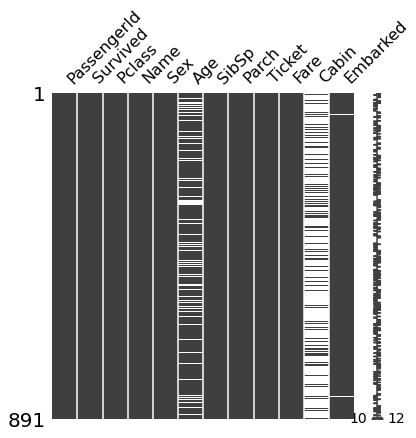

In [33]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df=df_train, figsize=(6,6))
plt.show()


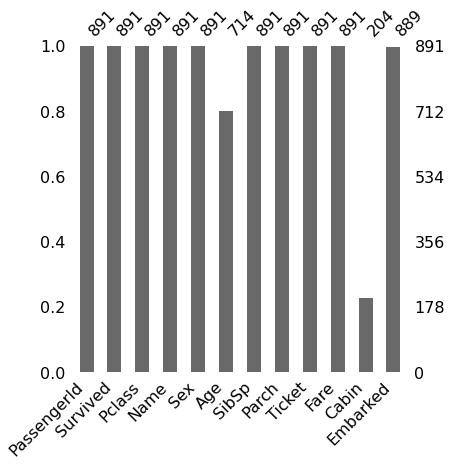

In [34]:
msno.bar(df=df_train, figsize=(6,6))
plt.show()

In [35]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

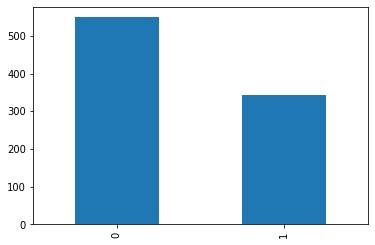

In [36]:
df_train['Survived'].value_counts().plot.bar()

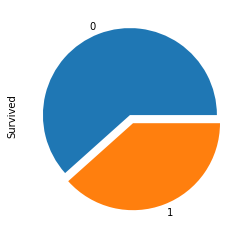

In [37]:
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1])
plt.show()

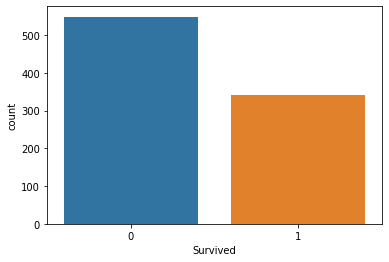

In [38]:
sns.countplot(x='Survived',data=df_train)
plt.show()

In [39]:
df_train[['Pclass','Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [40]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [41]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [42]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values

<bound method DataFrame.sort_values of         Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363>

In [43]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [44]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [45]:
pd.crosstab(df_train['Pclass'],df_train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [46]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [47]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [48]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


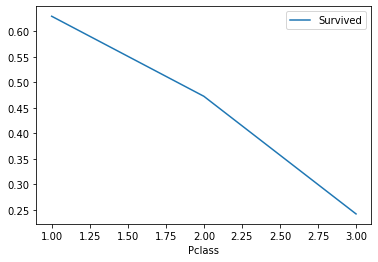

In [49]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot()

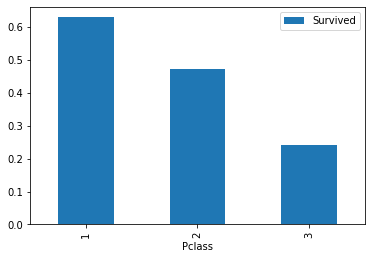

In [50]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()
plt.show()


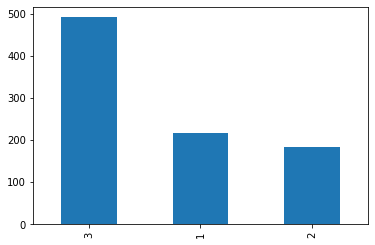

In [51]:
df_train['Pclass'].value_counts().plot.bar()
plt.show()

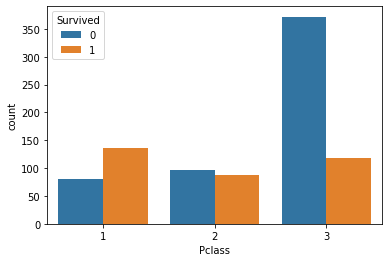

In [52]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)
plt.show()

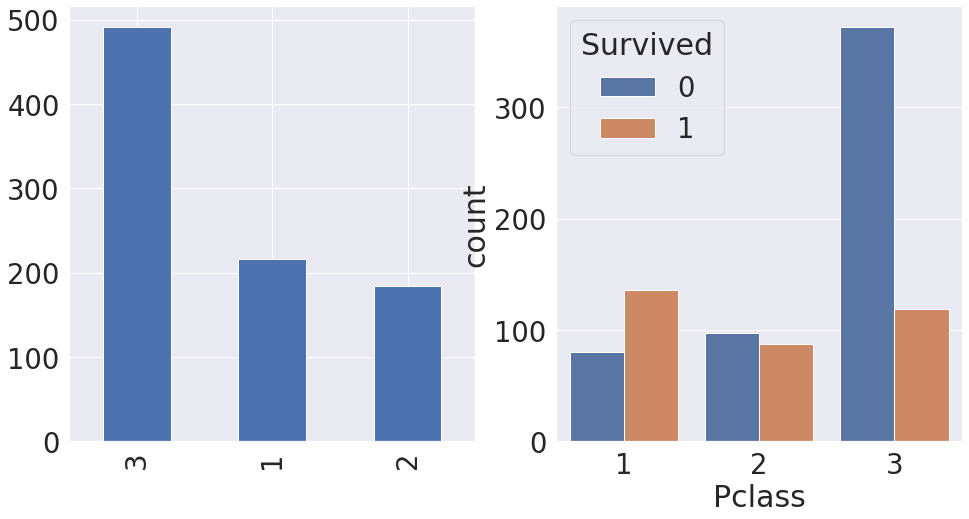

In [53]:
sns.set(font_scale=2.5)
f,ax=plt.subplots(1,2,figsize=(16,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
sns.countplot(x='Pclass',hue='Survived',data=df_train, ax=ax[1])
plt.show()

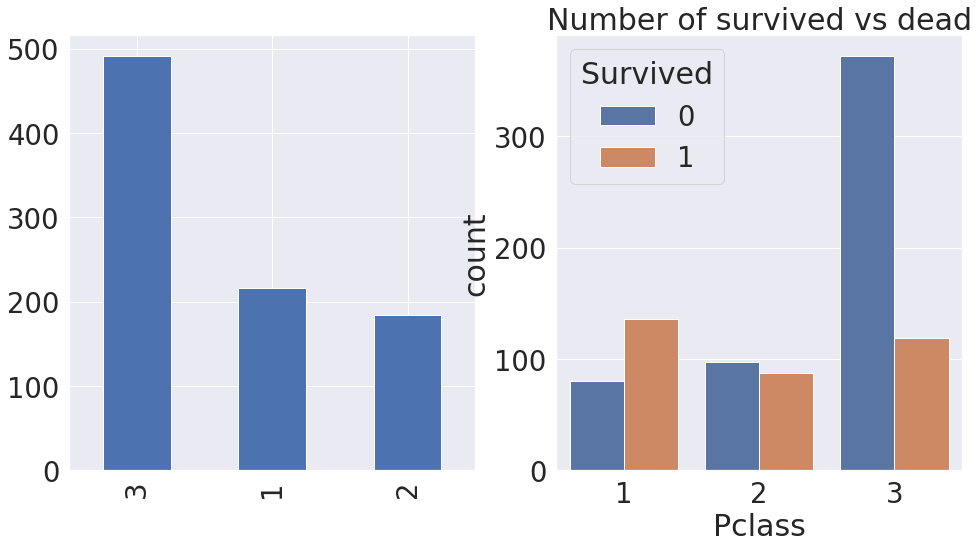

In [54]:
sns.set(font_scale=2.5)
f,ax=plt.subplots(1,2,figsize=(16,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
sns.countplot(x='Pclass',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Number of survived vs dead')
plt.show()

In [55]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


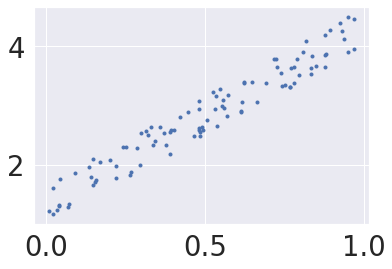

In [59]:
import numpy as np
x = np.random.rand(100)
eps = np.random.rand(100)/1.5
y =3*x+1+eps
plt.plot(x,y,'.')
plt.show()

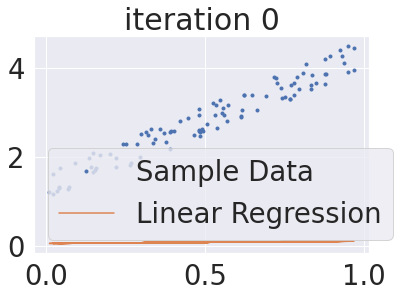

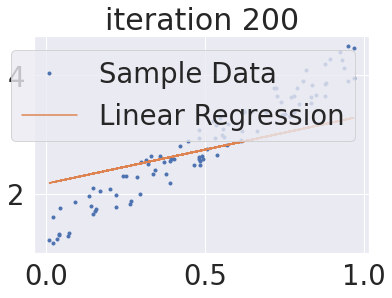

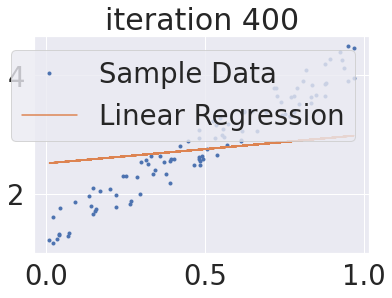

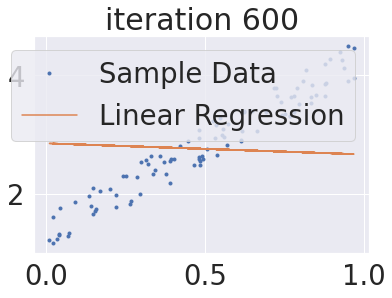

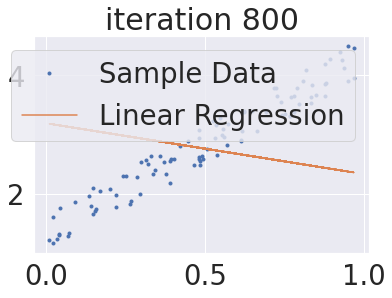

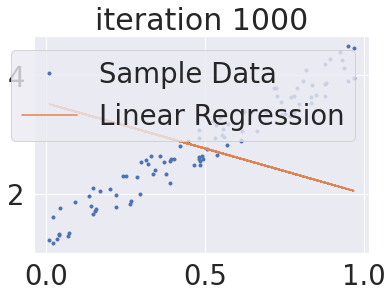

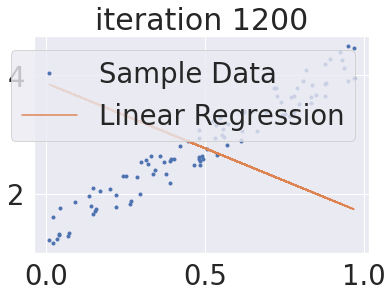

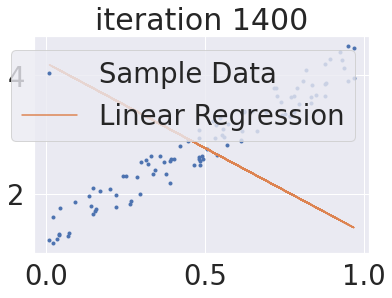

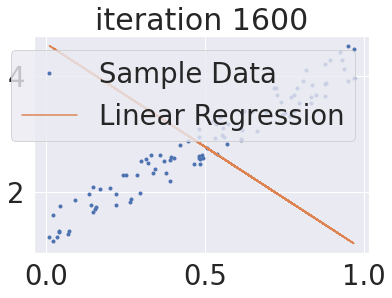

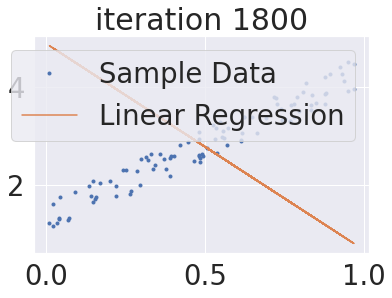

In [60]:
a=0
b=0
alpha=0.01
n=100
err_evolve=[]
it_index=[]
for it in range(2000):
  
  delta_a=0
  delta_b=0
  err=0
  for i in range(n):
    delta_a=delta_a+2*(a*x[i]+b-y[i])+x[i]
    delta_b=delta_b+2*(a*x[i]+b-y[i])
    err=err+(a*x[i]+b-y[i])*(a*x[i]+b-y[i])/n
  a=a-alpha*delta_a/n
  b=b-alpha*delta_b/n
  err_evolve.append(err)
  it_index.append(it)
  if it%200==0:
    plt.plot(x,y,'.',x,a*x+b)
    plt.legend(labels=('Sample Data','Linear Regression'))
    plt.title('iteration %d' %it)
    plt.show()

In [61]:
a

-4.887890736335584

In [62]:
b

5.229659265274167

In [63]:
print(err)

4.753471565326826


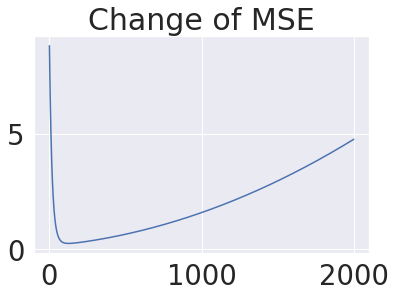

In [64]:
plt.plot(it_index,err_evolve)
plt.title('Change of MSE')
plt.show()

In [65]:
from sklearn.datasets import make_regression
x,y,coeff = make_regression(n_samples=200, n_features=1, bias=10, noise=50,coef=True, random_state=1)

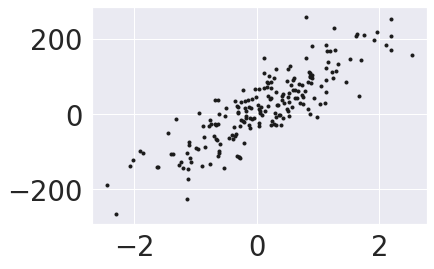

In [66]:
import matplotlib.pyplot as plt
plt.plot(x,y,'k.')
plt.show()

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model = model.fit(x,y)

In [68]:
model.coef_

array([89.01678804])

In [69]:
model.intercept_

8.95754344934731

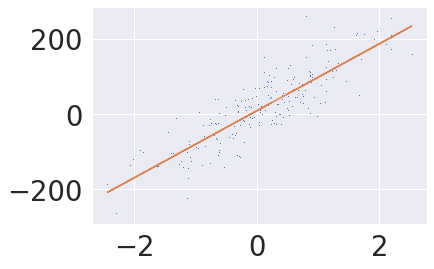

In [70]:
y_pred = model.predict(x)
plt.plot(x,y,',',x,y_pred)